<a href="https://colab.research.google.com/github/himalachudel/FDSFE_HAcharya/blob/main/Classroomcodings/Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

In [2]:
!apt install python3-rtree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6 python3-rtree
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 365 kB of archives.
After this operation, 1,799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 python3-rtree all 0.9.7-1 [46.4 kB]
Fetched 365 kB in 1s (481 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading 

In [3]:
import geopandas as gpd

In [4]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [5]:
world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

<ipython-input-5-c93229c2f128>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [6]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [7]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

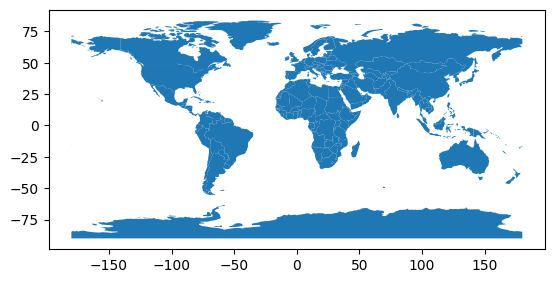

In [8]:
world.plot()

In [9]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

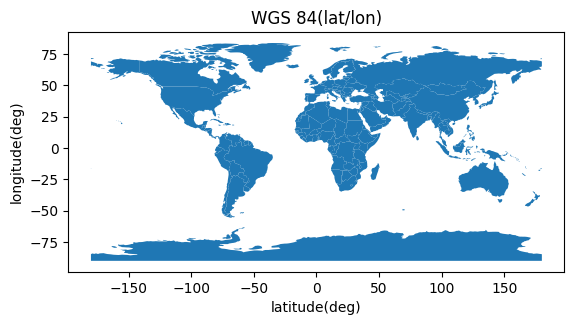

In [10]:
ax=world.plot()
ax.set_title("WGS 84(lat/lon)")
ax.set_xlabel("latitude(deg)")
ax.set_ylabel("longitude(deg)");

(-10000000.0, 20000000.0)

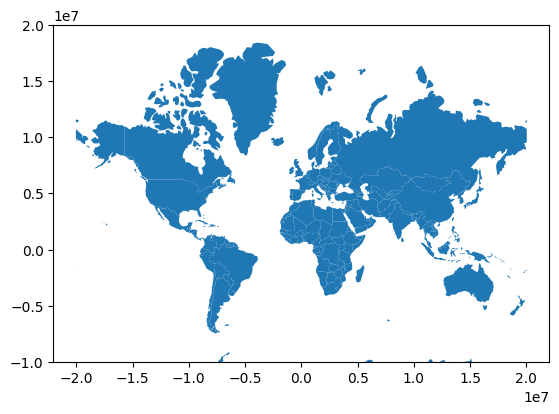

In [13]:
ax=world.to_crs("EPSG:3395").plot();
ax.set_ylim(-0.1e8,0.2e8)

In [20]:
world[(world["name"]!="Antartica") & (world["name"]!="Fr.S.Antartic Lands")]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [22]:
world_nopoles=world[(world["name"]!="Antartica") & (world["name"]!="Fr.S.Antartic Lands")]

In [23]:
import pandas as pd

In [25]:
arrests=pd.read_csv("https://media.githubusercontent.com/media/phillydao/phillydao-public-data/main/docs/data/arrest_data_daily_by_zip.csv")
arrests

,date_value,ZCTA_GEOID,Aggravated Assault,Altered Firearm Serial Number,Arson,Auto Theft,Burglary/Commercial,Burglary/Residential,Carjacking,Criminal Mischief,...,Sexual Assault and Other Sex Offenses,Simple Assault,Strangulation,Theft,Theft from Auto,Threats of Violence,Trespass,Uncategorized Offenses,Victim/Witness Intimidation & Retaliation,Violation of Protection Order
0,2014-01-01,19102,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2014-01-01,19103,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014-01-01,19104,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,0
3,2014-01-01,19106,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014-01-01,19107,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148563,2022-04-20,19151,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148564,2022-04-20,19152,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148565,2022-04-20,19153,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148566,2022-04-20,19154,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148568 entries, 0 to 148567
Data columns (total 45 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   date_value                                 148568 non-null  object
 1   ZCTA_GEOID                                 148568 non-null  object
 2   Aggravated Assault                         148568 non-null  int64 
 3   Altered Firearm Serial Number              148568 non-null  int64 
 4   Arson                                      148568 non-null  int64 
 5   Auto Theft                                 148568 non-null  int64 
 6   Burglary/Commercial                        148568 non-null  int64 
 7   Burglary/Residential                       148568 non-null  int64 
 8   Carjacking                                 148568 non-null  int64 
 9   Criminal Mischief                          148568 non-null  int64 
 10  Disorderly Conduct  

In [29]:
arrests["date_value"][30:60]

30    2014-01-01
31    2014-01-01
32    2014-01-01
33    2014-01-01
34    2014-01-01
35    2014-01-01
36    2014-01-01
37    2014-01-01
38    2014-01-01
39    2014-01-01
40    2014-01-01
41    2014-01-01
42    2014-01-01
43    2014-01-01
44    2014-01-01
45    2014-01-01
46    2014-01-01
47    2014-01-01
48    2014-01-01
49    2014-01-02
50    2014-01-02
51    2014-01-02
52    2014-01-02
53    2014-01-02
54    2014-01-02
55    2014-01-02
56    2014-01-02
57    2014-01-02
58    2014-01-02
59    2014-01-02
Name: date_value, dtype: object

In [28]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148568 entries, 0 to 148567
Data columns (total 45 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   date_value                                 148568 non-null  object
 1   ZCTA_GEOID                                 148568 non-null  object
 2   Aggravated Assault                         148568 non-null  int64 
 3   Altered Firearm Serial Number              148568 non-null  int64 
 4   Arson                                      148568 non-null  int64 
 5   Auto Theft                                 148568 non-null  int64 
 6   Burglary/Commercial                        148568 non-null  int64 
 7   Burglary/Residential                       148568 non-null  int64 
 8   Carjacking                                 148568 non-null  int64 
 9   Criminal Mischief                          148568 non-null  int64 
 10  Disorderly Conduct  

In [31]:
arrests["ZCTA_GEOID"].unique().shape

(49,)

In [34]:
ziparrests=arrests.groupby("ZCTA_GEOID").sum()
ziparrests

<ipython-input-34-948b3df4439b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ziparrests=arrests.groupby("ZCTA_GEOID").sum()


,Aggravated Assault,Altered Firearm Serial Number,Arson,Auto Theft,Burglary/Commercial,Burglary/Residential,Carjacking,Criminal Mischief,Disorderly Conduct,Drug Possession,...,Sexual Assault and Other Sex Offenses,Simple Assault,Strangulation,Theft,Theft from Auto,Threats of Violence,Trespass,Uncategorized Offenses,Victim/Witness Intimidation & Retaliation,Violation of Protection Order
ZCTA_GEOID,,,,,,,,,,,,,,,,,,,,,
19102,217,0,4,12,91,16,3,52,23,255,...,36,100,8,241,1,86,51,582,9,9
19103,225,0,7,29,129,91,1,81,22,81,...,39,88,12,453,5,44,80,529,4,19
19104,836,1,24,87,114,329,24,119,6,833,...,75,281,68,792,4,119,63,1382,17,77
19106,138,0,9,13,64,45,4,47,1,64,...,15,41,5,201,5,38,11,359,2,1
19107,484,0,16,41,176,64,8,119,21,188,...,61,165,17,610,3,92,65,1050,68,12
19109,1,0,0,0,1,0,0,1,0,0,...,0,2,0,6,0,0,0,10,0,0
19111,449,0,6,48,40,186,11,96,2,190,...,63,236,69,268,15,101,34,300,13,176
19112,3,0,0,0,6,1,0,5,0,1,...,1,1,0,15,0,0,0,1,0,1
19114,234,1,5,24,57,48,4,32,2,29,...,26,104,26,182,6,44,11,135,6,74


In [38]:
zip=gpd.GeodataFrame.from_file("https://opendata.arcgis.com/api/v3/datasets/ad233733f89242af9a1f9e52d60d1e4e_0/downloads/data?format=shp&spatialRefId=4326")

AttributeError: ignored

In [41]:
zip = gpd.GeoDataFrame.from_file(“https://opendata.arcgis.com/api/v3/datasets/ad233733f89242af9a1f9e52d60d1e4e_0/downloads/data?format=shp&spatialRefId=4326”)

SyntaxError: ignored

In [39]:
zip=gpd.GeodataFrame.from_file("“https://opendata.arcgis.com/api/v3/datasets/b54ec5210cee41c3a884c9086f7af1be_0/downloads/data?format=shp&spatialRefId=4326”")

AttributeError: ignored

In [40]:
dumpsites = gpd.GeoDataFrame.from_file(“https://opendata.arcgis.com/api/v3/datasets/129e346cc7654079980860b0656587a5_0/downloads/data?format=shp&spatialRefId=4326”)

SyntaxError: ignored